# The Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Meteorite Landing - Meteorite-Landings.csv')
df.head(50)

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,"DateObject[{1951}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,"DateObject[{1952}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,"DateObject[{1976}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,"DateObject[{1902}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-33.16667, -64.95}]"
5,Adhi Kot,379,Valid,EH4,"Quantity[4239, ""Grams""]",Fell,"DateObject[{1919}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{32.1, 71.8}]"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,"Quantity[910, ""Grams""]",Fell,"DateObject[{1949}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{44.83333, 95.16667}]"
7,Agen,392,Valid,H5,"Quantity[30000, ""Grams""]",Fell,"DateObject[{1814}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{44.21667, 0.61667}]"
8,Aguada,398,Valid,L6,"Quantity[1620, ""Grams""]",Fell,"DateObject[{1930}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-31.6, -65.23333}]"
9,Aguila Blanca,417,Valid,L,"Quantity[1440, ""Grams""]",Fell,"DateObject[{1920}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-30.86667, -64.55}]"


<h3>All missing values are 'Missing["Not Available"]'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            45716 non-null  object
 1   ID              45716 non-null  int64 
 2   NameType        45716 non-null  object
 3   Classification  45716 non-null  object
 4   Mass            45716 non-null  object
 5   Fall            45716 non-null  object
 6   Year            45716 non-null  object
 7   Coordinates     45716 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB


In [4]:
df.describe()

,ID
count,45716.000000
mean,26889.735104
std,16860.683030
min,1.000000
25%,12688.750000
50%,24261.500000
75%,40656.750000
max,57458.000000


# The Cleanup Crew

In [5]:
df[['__mass_1__', '__mass_2__']] = df['Mass'].str.split(',', expand=True)
df[['__mass_1__', '__mass_2__']]
df['__mass_2__'].describe()

count         45585
unique            1
top        "Grams"]
freq          45585
Name: __mass_2__, dtype: object

<h3>All rows in Mass column follow the same pattern (all are in grams only)

In [6]:
mass_num = df['Mass'].str.extract(r'Quantity\[(\d+\.?\d*)').astype(float)
df['mass_num'] = mass_num
print('Series:\n', df['mass_num'], '\n')
print('Info:\n', df['mass_num'].info(), '\n')
print('Describe:\n', df['mass_num'].describe(), '\n')

Series:
 0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
45711       172.0
45712        46.0
45713         3.3
45714      2167.0
45715       200.0
Name: mass_num, Length: 45716, dtype: float64 

<class 'pandas.core.series.Series'>
RangeIndex: 45716 entries, 0 to 45715
Series name: mass_num
Non-Null Count  Dtype  
--------------  -----  
45585 non-null  float64
dtypes: float64(1)
memory usage: 357.3 KB
Info:
 None 

Describe:
 count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass_num, dtype: float64 



<h3>Mass '0' does not make sense along with missing mass

In [7]:
df['mass_num_2'] = df[df['mass_num']!=0]['mass_num']
df['mass_num_2'].describe()

count    4.556600e+04
mean     1.328362e+04
std      5.751087e+05
min      1.000000e-02
25%      7.200000e+00
50%      3.269500e+01
75%      2.028000e+02
max      6.000000e+07
Name: mass_num_2, dtype: float64

In [8]:
df.drop(columns=['mass_num'], inplace=True)

In [9]:
df.dropna(subset=['mass_num_2'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45566 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45566 non-null  object 
 1   ID              45566 non-null  int64  
 2   NameType        45566 non-null  object 
 3   Classification  45566 non-null  object 
 4   Mass            45566 non-null  object 
 5   Fall            45566 non-null  object 
 6   Year            45566 non-null  object 
 7   Coordinates     45566 non-null  object 
 8   __mass_1__      45566 non-null  object 
 9   __mass_2__      45566 non-null  object 
 10  mass_num_2      45566 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 4.2+ MB


In [11]:
df[['__year_1__', '__year_2__']] = df['Year'].str.split(',', n=1, expand=True)
df[['__year_1__', '__year_2__']]
df['__year_2__'].describe()

count                          45290
unique                             1
top        "Year", "Gregorian", -5.]
freq                           45290
Name: __year_2__, dtype: object

<h3>Again all rows follow the same pattern

In [12]:
year_num = df['Year'].str.extract(r'(\d{4})').astype(float)
df['year_num'] = year_num
df['year_num'].describe()

count    45289.000000
mean      1991.994480
std         23.321557
min       1399.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2013.000000
Name: year_num, dtype: float64

<h3>No decimal years => no erroneous data

In [13]:
df['Coordinates'].describe()

count                       45566
unique                      17033
top       Missing["NotAvailable"]
freq                        13516
Name: Coordinates, dtype: object

In [14]:
df[['X', 'Y']] = df['Coordinates'].str.extract(r'(\d+\.?\d*),\s*(\d+\.?\d*)').astype(float)
df[['X', 'Y']].describe()

,X,Y
count,28021.00000,28021.000000
mean,63.42600,95.599512
std,23.62460,60.785448
min,0.00000,0.013060
25%,51.75000,35.666670
50%,72.77500,75.313610
75%,79.68333,159.750000
max,85.66667,178.200000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45566 entries, 0 to 45715
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45566 non-null  object 
 1   ID              45566 non-null  int64  
 2   NameType        45566 non-null  object 
 3   Classification  45566 non-null  object 
 4   Mass            45566 non-null  object 
 5   Fall            45566 non-null  object 
 6   Year            45566 non-null  object 
 7   Coordinates     45566 non-null  object 
 8   __mass_1__      45566 non-null  object 
 9   __mass_2__      45566 non-null  object 
 10  mass_num_2      45566 non-null  float64
 11  __year_1__      45566 non-null  object 
 12  __year_2__      45290 non-null  object 
 13  year_num        45289 non-null  float64
 14  X               28021 non-null  float64
 15  Y               28021 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 5.9+ MB


In [16]:
df.drop(columns=['Mass', '__mass_1__', '__mass_2__', 'Year', '__year_1__', '__year_2__', 'Coordinates'], inplace=True)
df.head(15)

,Name,ID,NameType,Classification,Fall,mass_num_2,year_num,X,Y
0,Aachen,1,Valid,L5,Fell,21.0,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,Fell,720.0,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,Fell,107000.0,1952.0,NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,Fell,1914.0,1976.0,NaN,NaN
4,Achiras,370,Valid,L6,Fell,780.0,1902.0,NaN,NaN
5,Adhi Kot,379,Valid,EH4,Fell,4239.0,1919.0,32.10000,71.80000
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,Fell,910.0,1949.0,44.83333,95.16667
7,Agen,392,Valid,H5,Fell,30000.0,1814.0,44.21667,0.61667
8,Aguada,398,Valid,L6,Fell,1620.0,1930.0,NaN,NaN
9,Aguila Blanca,417,Valid,L,Fell,1440.0,1920.0,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45566 entries, 0 to 45715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45566 non-null  object 
 1   ID              45566 non-null  int64  
 2   NameType        45566 non-null  object 
 3   Classification  45566 non-null  object 
 4   Fall            45566 non-null  object 
 5   mass_num_2      45566 non-null  float64
 6   year_num        45289 non-null  float64
 7   X               28021 non-null  float64
 8   Y               28021 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.5+ MB


<h3>Can dropna rows of year_num

In [18]:
df.dropna(subset=['year_num'], inplace=True)
df.describe()

,ID,mass_num_2,year_num,X,Y
count,45289.000000,4.528900e+04,45289.000000,27907.000000,27907.000000
mean,26792.658593,1.332113e+04,1991.994480,63.598567,95.752501
std,16827.521211,5.768540e+05,23.321557,23.515121,60.852429
min,1.000000,1.000000e-02,1399.000000,0.000000,0.013060
25%,12644.000000,7.150000e+00,1987.000000,54.883335,35.666670
50%,24155.000000,3.216900e+01,1998.000000,72.775280,75.313889
75%,40499.000000,2.001000e+02,2003.000000,79.683330,159.750000
max,57458.000000,6.000000e+07,2013.000000,85.666670,178.200000


In [33]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45289 entries, 0 to 45715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45289 non-null  object 
 1   ID              45289 non-null  int64  
 2   NameType        45289 non-null  object 
 3   Classification  45289 non-null  object 
 4   Fall            45289 non-null  object 
 5   mass_num_2      45289 non-null  float64
 6   year_num        45289 non-null  float64
 7   X               27907 non-null  float64
 8   Y               27907 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.5+ MB


In [34]:
df['Name'].value_counts()

Name
Aachen        1
Aarhus        1
Abee          1
Acapulco      1
Achiras       1
             ..
Zillah 002    1
Zinder        1
Zlin          1
Zubkovsky     1
Zulu Queen    1
Name: count, Length: 45289, dtype: int64

<h3>All names are unique no duplicates found

# The Detective Work

In [35]:
df.head()

,Name,ID,NameType,Classification,Fall,mass_num_2,year_num,X,Y
0,Aachen,1,Valid,L5,Fell,21.0,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,Fell,720.0,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,Fell,107000.0,1952.0,NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,Fell,1914.0,1976.0,NaN,NaN
4,Achiras,370,Valid,L6,Fell,780.0,1902.0,NaN,NaN


<h3>Top 10 heaviest meteorites

In [103]:
df.sort_values(by='mass_num_2', ascending=False).head(10)#.plot(subplots=True, kind='barh', title='Top 10 heaviest meteorites', x_labels='Name')

,Name,ID,NameType,Classification,Fall,mass_num_2,year_num,X,Y
16392,Hope,11890,Valid,"Iron, IVB",Found,60000000.0,1920.0,19.58333,17.91667
5373,Catalina 011,5262,Valid,"Iron, IIIAB",Found,58200000.0,1818.0,NaN,NaN
5365,Catalina 003,5247,Valid,"Iron, IAB-MG",Found,50000000.0,1575.0,NaN,NaN
5370,Catalina 008,5257,Valid,"Iron, IAB-MG",Found,30000000.0,1891.0,NaN,NaN
3455,Asuka 8602,2335,Valid,"Iron, IIIE",Found,28000000.0,1898.0,47.00000,88.00000
12613,Glorieta Mountain,10912,Valid,"Iron, IVA",Found,26000000.0,1836.0,25.50000,18.00000
5468,Colorado Springs,5363,Valid,"Iron, IIIAB",Found,24300000.0,1852.0,NaN,NaN
26297,Mundrabilla 005,16852,Valid,"Iron, IAB-ung",Found,24000000.0,1911.0,30.78333,127.55000
920,Sinai,23593,Valid,"Iron, IIAB",Fell,23000000.0,1947.0,46.16000,134.65333
5016,Bates Nunataks A78005,4919,Valid,"Iron, ungrouped",Found,22000000.0,1863.0,NaN,NaN


<h3>Fell vs Found

count    4.421500e+04
mean     1.250028e+04
std      5.729967e+05
min      1.000000e-02
25%      6.900000e+00
50%      3.000000e+01
75%      1.760000e+02
max      6.000000e+07
Name: mass_num_2, dtype: float64

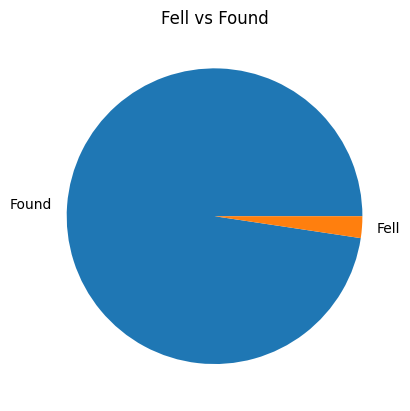

In [82]:
df['Fall'].value_counts().plot(kind='pie', title='Fell vs Found', ylabel='')
df[df['Fall']=='Found']['mass_num_2'].describe()

<h3>Count of the meteorites found is 44,215 <br>
And the average mass for the meteorites that were found comes out to be 12,500 grams